In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('vinos_filtrado.csv')
data = data.drop(['Unnamed: 0','Customer_Segment'], axis = 1)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
2,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
3,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
4,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
96,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
97,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
98,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750


In [4]:
data.shape

(100, 13)

In [5]:
#Conocer los datos nulos
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#Conocer el formato de los datos
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
2,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
3,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
4,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
5,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
6,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
7,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
8,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
9,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845


In [8]:
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [22, 52, 90]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)
muestras

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
1,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500
2,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675


In [9]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [10]:
### ANÁLISIS DE MACHINE LEARNING ###

#Se determina las variables a evaluar
X = data_escalada

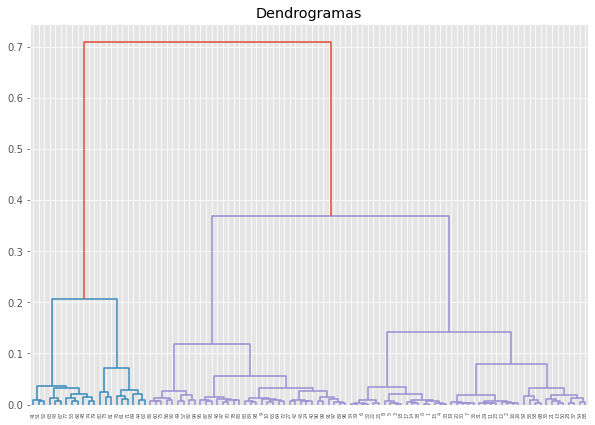

In [11]:
#Se gráfica el dendrograma para obtener el número de clúster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.show()

In [30]:
#Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering

In [31]:
#Se define el algoritmo junto con el valor de K
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward')

In [32]:
#Se entrena el algoritmo
algoritmo.fit(X)

AgglomerativeClustering(n_clusters=3)

In [41]:
etiquetas = algoritmo.labels_
print(etiquetas)
np.unique(etiquetas, return_counts=True)

[1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 0 2 0 0 2 2 2 0 2 1 0 0 0 1 1 2 2 1 1 2 0 0 0 2 2 0 0 1 0 2 0 2 0
 0 2 0 0 2 0 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]


(array([0, 1, 2], dtype=int64), array([21, 43, 36], dtype=int64))

In [15]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

In [29]:
for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0


In [20]:
from sklearn.metrics import davies_bouldin_score
jerarquico_daviesBouldin = davies_bouldin_score(X, algoritmo.labels_)
jerarquico_daviesBouldin = jerarquico_daviesBouldin
jerarquico_daviesBouldin

0.5418541639325025

In [21]:
# Compute the silhouette scores for each algorithm
from sklearn.metrics import silhouette_score
jerarquico_silhouette = silhouette_score(X, algoritmo.labels_)
jerarquico_silhouette = jerarquico_silhouette
jerarquico_silhouette

0.5530393994299384

In [22]:
from sklearn.metrics import calinski_harabasz_score
jerarquico_calinski_harabasz_score = calinski_harabasz_score(X, algoritmo.labels_)
jerarquico_calinski_harabasz_score = jerarquico_calinski_harabasz_score
jerarquico_calinski_harabasz_score

288.6662556604512

In [23]:
metricasKMeans = pd.read_csv('metricasKMeans.csv')
mKMeans = metricasKMeans.drop(['Unnamed: 0'], axis = 1)
mKMeans

,0
0,0.570000
1,0.532732
2,288.250210


COMPARATIVA RESULTADOS OBTENIDOS

METRICA DAVIES BOULDIN

In [24]:
print('KMeans:', str(mKMeans['0'][1]),'Jerarquico:',jerarquico_daviesBouldin)

KMeans: 0.5327324320008414 Jerarquico: 0.5418541639325025


METRICA SILHOUETTE

In [25]:
print('KMeans:', str(mKMeans['0'][0]),'Jerarquico:',jerarquico_silhouette)

KMeans: 0.57 Jerarquico: 0.5530393994299384


METRICA CALINSKI HARABASZ

In [26]:
print('KMeans:', str(mKMeans['0'][2]),'Jerarquico:',jerarquico_calinski_harabasz_score)

KMeans: 288.25020990019385 Jerarquico: 288.6662556604512


GRAFICOS

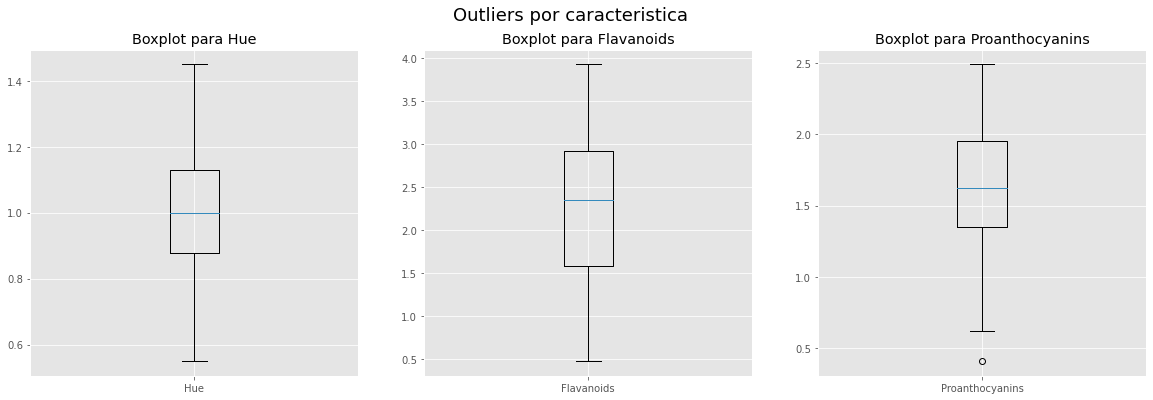

In [59]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Outliers por caracteristica', fontsize=18)
for col in ['Hue','Flavanoids','Proanthocyanins']:
    ax[i].set_title('Boxplot para ' + col)
    ax[i].boxplot(data[col], labels=[col])  
    i=i+1
plt.show()

Con este gráfico de cajas podemos identificar outliers, pero se puede evidenciar que la limpieza previa realizada fue efectiva debido a que no se encuentra outliers

In [50]:
newData = data.assign(Clusters = etiquetas)
newData

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
2,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
3,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
4,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,2
96,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,2
97,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
98,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2


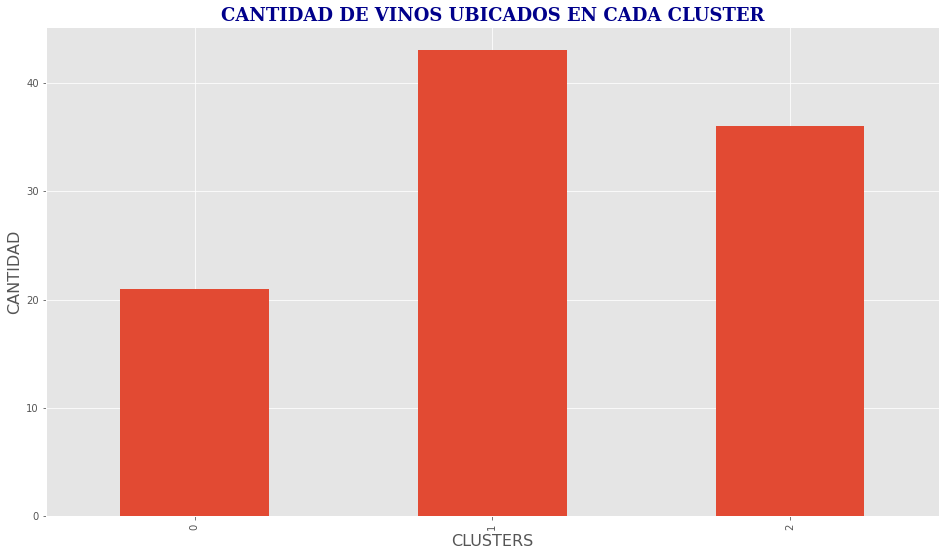

In [58]:
newData.groupby('Clusters').count()["Alcohol"].plot(kind='bar')
plt.xlabel("CLUSTERS", size = 16,)
plt.ylabel("CANTIDAD", size = 16)

plt.title("CANTIDAD DE VINOS UBICADOS EN CADA CLUSTER", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

En el gráfico de barras podemos observar un conteo de cuantos vinos pertenecen a cada cluster, en donde la existen mas registros del tipo 1, luego le sigue el tipo 2 y por ultimo el tipo 0

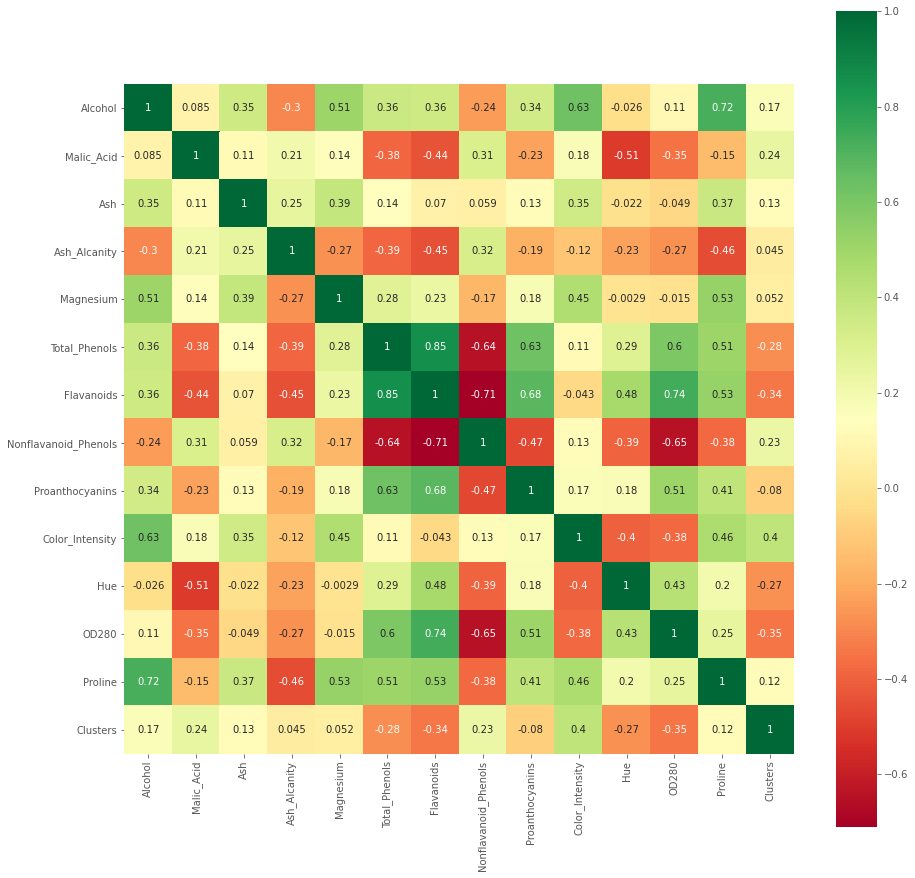

In [60]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sb.heatmap(newData.corr(method="pearson"), annot=True,cmap='RdYlGn',square=True)

En este grafico de calor podemos observar la correlacion de las variables, como la variable que nos interesa es la de Clusters para un analisis posterior se podria utilizar Malic_Acid, Ash, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Color_Intesity para realizar un modelo